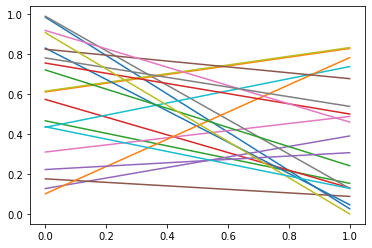

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def on_press(event):
    if event.inaxes is None: return
    for line in event.inaxes.lines:
        if event.key=='t':
            visible = line.get_visible()
            line.set_visible(not visible)
    event.inaxes.figure.canvas.draw()

fig, ax = plt.subplots(1)

fig.canvas.mpl_connect('key_press_event', on_press)

ax.plot(np.random.rand(2, 20))

plt.show()

In [3]:
# Import the FigureCanvas from the backend of your choice
#  and attach the Figure artist to it.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# Import the numpy library to generate the random numbers.
import numpy as np
x = np.random.randn(10000)

# Now use a figure method to create an Axes artist; the Axes artist is
#  added automatically to the figure container fig.axes.
# Here "111" is from the MATLAB convention: create a grid with 1 row and 1
#  column, and use the first cell in that grid for the location of the new
#  Axes.
ax = fig.add_subplot(111)

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes container.  Here "100" means create 100 bins.
ax.hist(x, 100)

# Decorate the figure with a title and save it.
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png')

<IPython.core.display.Javascript object>


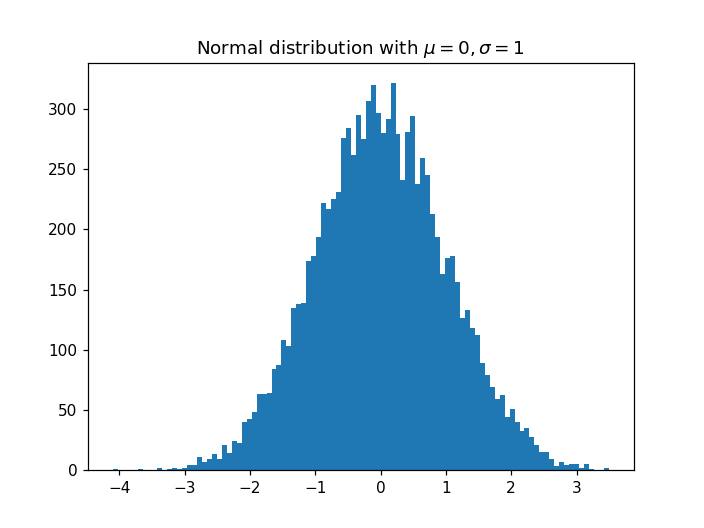

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

<IPython.core.display.Javascript object>


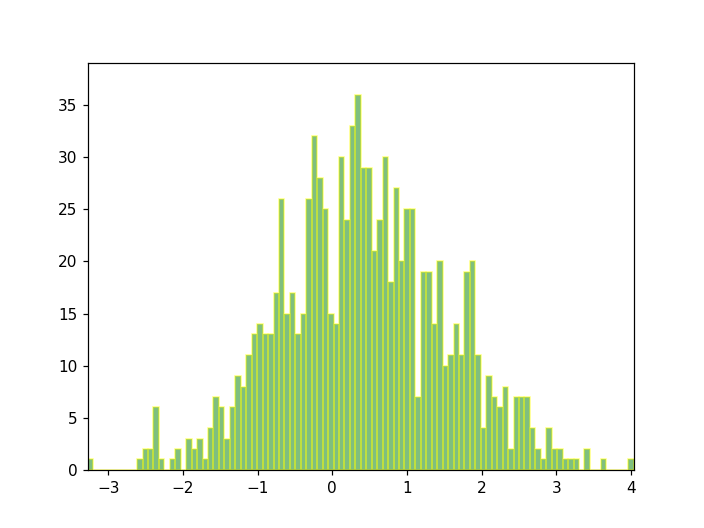

In [28]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

def animate(i):
    #plt.clear()
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    #plt.annotate('n = {}'.format(i), [2,i/2]) #frameno 
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

<IPython.core.display.Javascript object>


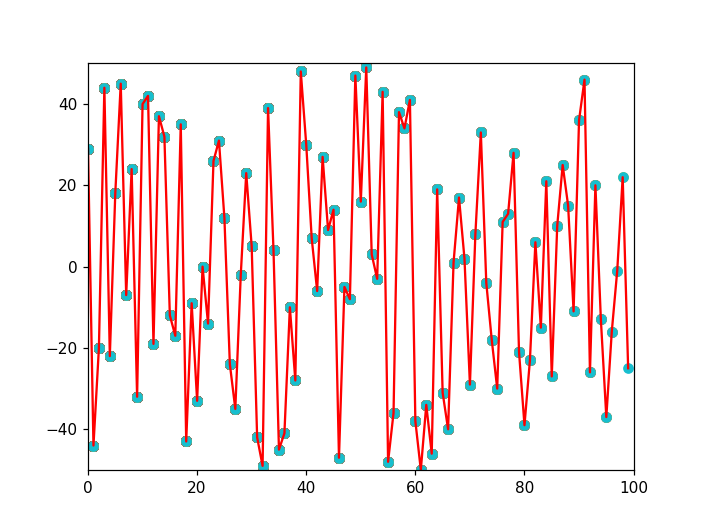

In [33]:
import matplotlib.pyplot as plt
import time
import random
 
ysample = random.sample(range(-50, 50), 100)
ysample 
xdata = []
ydata = []
 
#plt.figure()

axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
line, = axes.plot(xdata, ydata, 'r-')
 
for i in range(100):
    xdata.append(i)
    ydata.append(ysample[i])
    plt.scatter(xdata,ydata)
    line.set_xdata(xdata)
    line.set_ydata(ydata)
    plt.draw()
    plt.pause(1e-17)
    time.sleep(0.1)

# add this if you don't want the window to disappear at the end
plt.show()

<IPython.core.display.Javascript object>


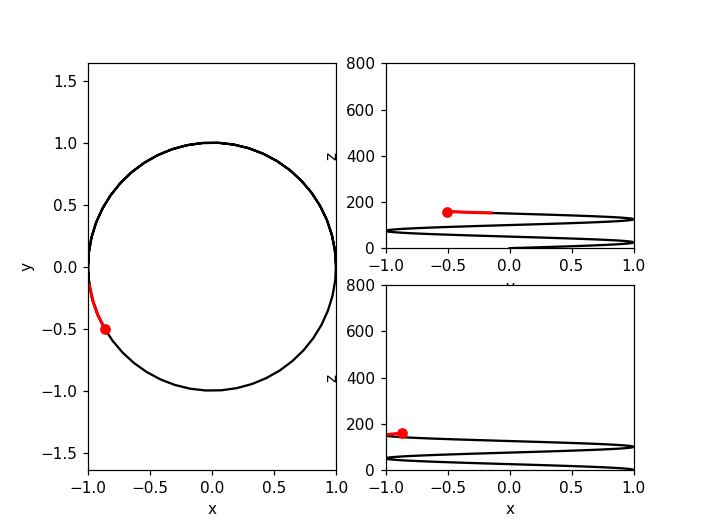

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

# This example uses subclassing, but there is no reason that the proper function
# couldn't be set up and then use FuncAnimation. The code is long, but not
# really complex. The length is due solely to the fact that there are a total
# of 9 lines that need to be changed for the animation as well as 3 subplots
# that need initial set up.
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_len = 10
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
            self.line2, self.line2a, self.line2e,
            self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines =  [self.line1, self.line1a, self.line1e,
            self.line2, self.line2a, self.line2e,
            self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
#ani.save('test_sub.mp4')
plt.show()

<IPython.core.display.Javascript object>


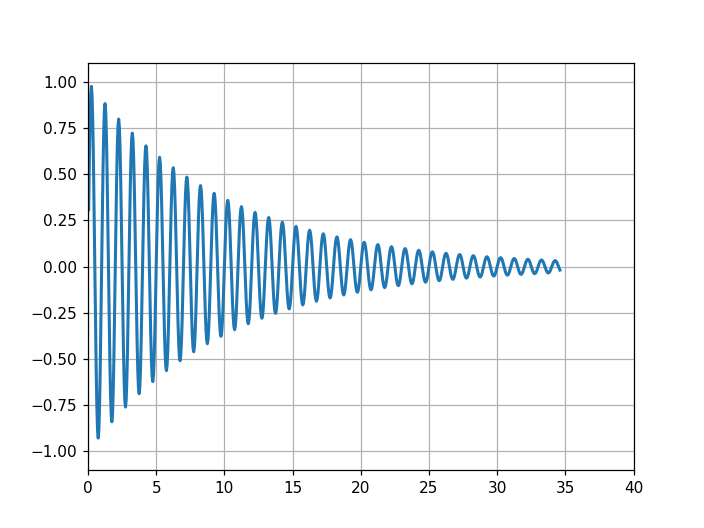

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()

<IPython.core.display.Javascript object>


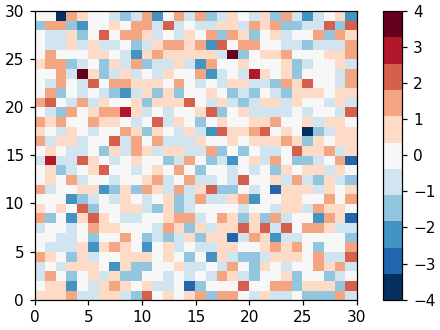

In [76]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

sp=11    
other = cm.get_cmap('RdBu_r', sp)
newcolors = np.vstack(other(np.linspace(0, 1,sp)))
#newcolors.shape
newcmp = ListedColormap(newcolors, name='RedBlue')
newcmp
plot_examples([newcmp])

<IPython.core.display.Javascript object>


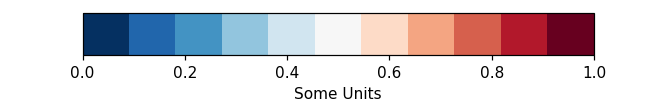

In [77]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = cm.get_cmap('RdBu_r', 11)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

<IPython.core.display.Javascript object>


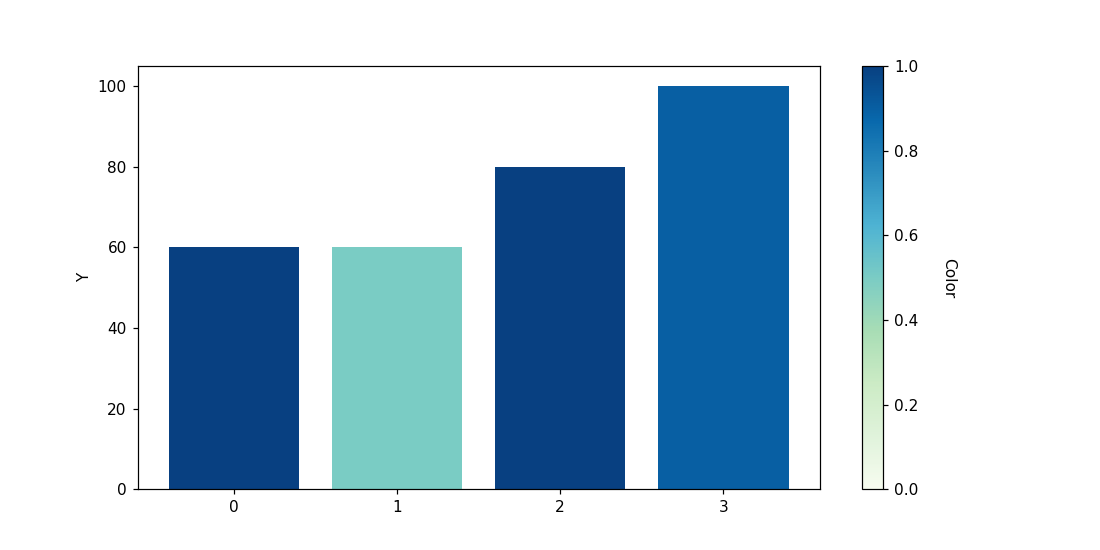

In [83]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

data_x = [0,1,2,3]
data_hight = [60,60,80,100]
data_color = [1000.,500.,1000.,900.]


data_color = [x / max(data_color) for x in data_color]
#print(data_color)
fig, ax = plt.subplots(figsize=(10, 5))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x)    
plt.ylabel("Y")

plt.show()

<IPython.core.display.Javascript object>


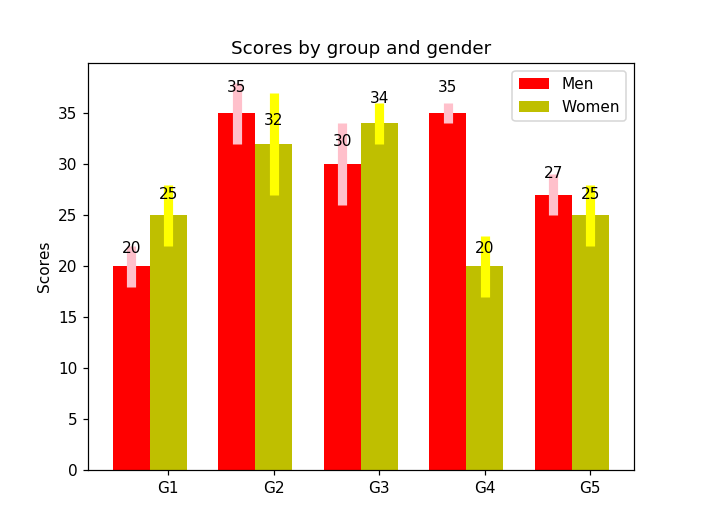

In [84]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure()

plt.subplot(111)
rects1 = plt.bar(ind, menMeans, width,
                    color='r',
                    yerr=menStd,
                    error_kw=dict(elinewidth=6, ecolor='pink'))

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = plt.bar(ind+width, womenMeans, width,
                    color='y',
                    yerr=womenStd,
                    error_kw=dict(elinewidth=6, ecolor='yellow'))

# add some
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width, ('G1', 'G2', 'G3', 'G4', 'G5') )

plt.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<IPython.core.display.Javascript object>


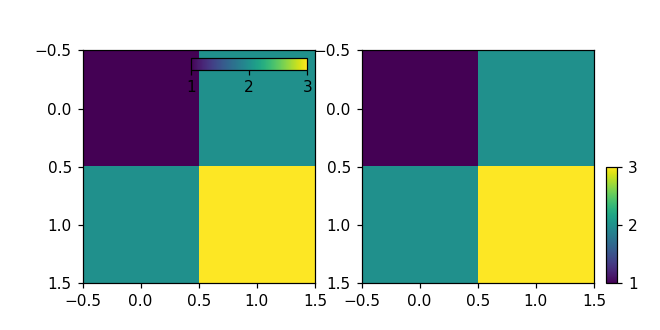

In [85]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

axins1 = inset_axes(ax1,
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='upper right')

im1 = ax1.imshow([[1, 2], [2, 3]])
fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
axins1.xaxis.set_ticks_position("bottom")

axins = inset_axes(ax2,
                   width="5%",  # width = 5% of parent_bbox width
                   height="50%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

# Controlling the placement of the inset axes is basically same as that
# of the legend.  you may want to play with the borderpad value and
# the bbox_to_anchor coordinate.

im = ax2.imshow([[1, 2], [2, 3]])
fig.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.show()

<IPython.core.display.Javascript object>


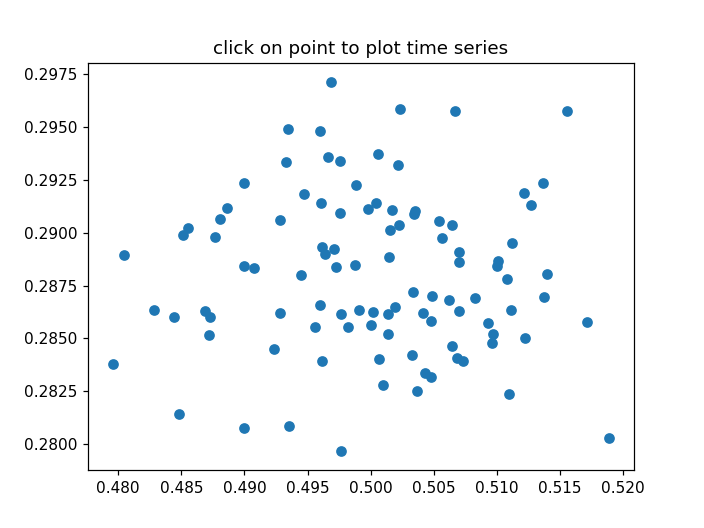

In [86]:
"""
compute the mean and stddev of 100 data sets and plot mean vs stddev.
When you click on one of the mu, sigma points, plot the raw data from
the dataset that generated the mean and stddev
"""
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist!=line: return True

    N = len(event.ind)
    if not N: return True


    figi = plt.figure()
    for subplotnum, dataind in enumerate(event.ind):
        ax = figi.add_subplot(N,1,subplotnum+1)
        ax.plot(X[dataind])
        ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

<IPython.core.display.Javascript object>


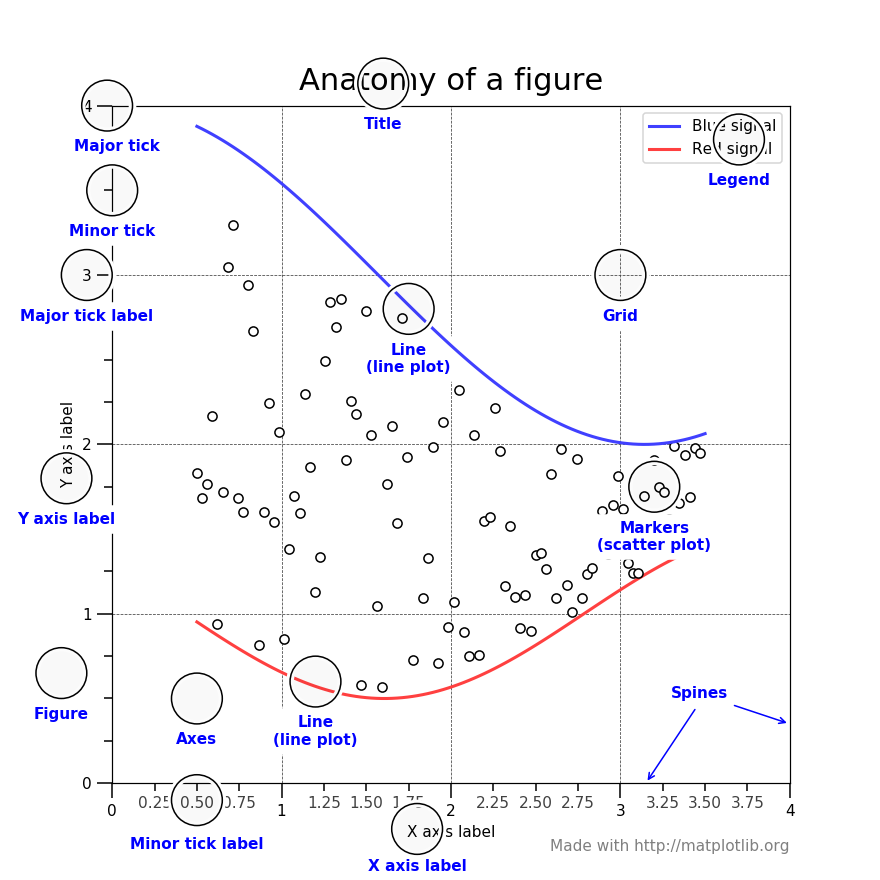

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

<IPython.core.display.Javascript object>


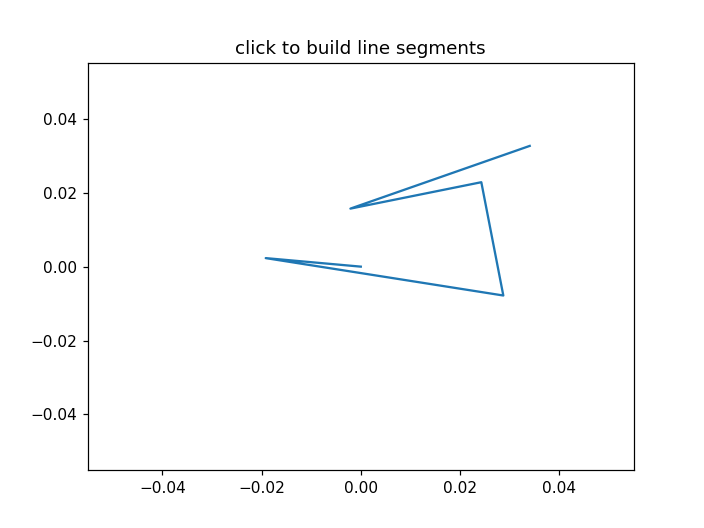

In [88]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()

<IPython.core.display.Javascript object>


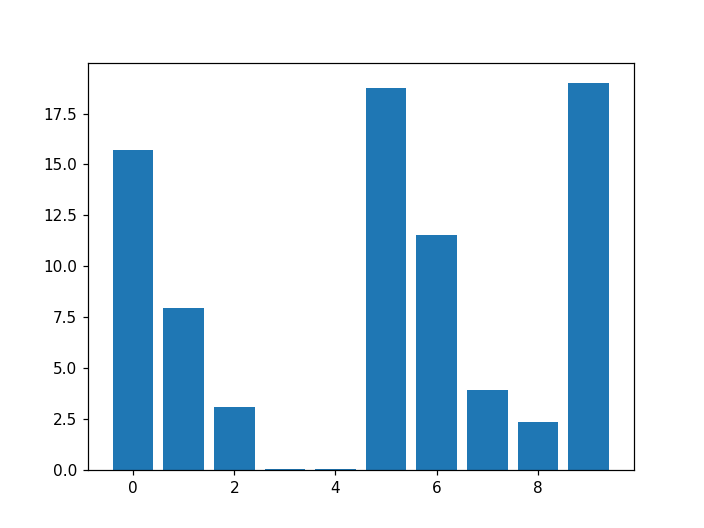

In [89]:
# Draggable rectangle with blitting.
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    lock = None  # only one can be animated at a time
    def __init__(self, rect):
        self.rect = rect
        self.press = None
        self.background = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return
        if DraggableRectangle.lock is not None: return
        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata
        DraggableRectangle.lock = self

        # draw everything but the selected rectangle and store the pixel buffer
        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        self.rect.set_animated(True)
        canvas.draw()
        self.background = canvas.copy_from_bbox(self.rect.axes.bbox)

        # now redraw just the rectangle
        axes.draw_artist(self.rect)

        # and blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if DraggableRectangle.lock is not self:
            return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        # restore the background region
        canvas.restore_region(self.background)

        # redraw just the current rectangle
        axes.draw_artist(self.rect)

        # blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_release(self, event):
        'on release we reset the press data'
        if DraggableRectangle.lock is not self:
            return

        self.press = None
        DraggableRectangle.lock = None

        # turn off the rect animation property and reset the background
        self.rect.set_animated(False)
        self.background = None

        # redraw the full figure
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

<IPython.core.display.Javascript object>


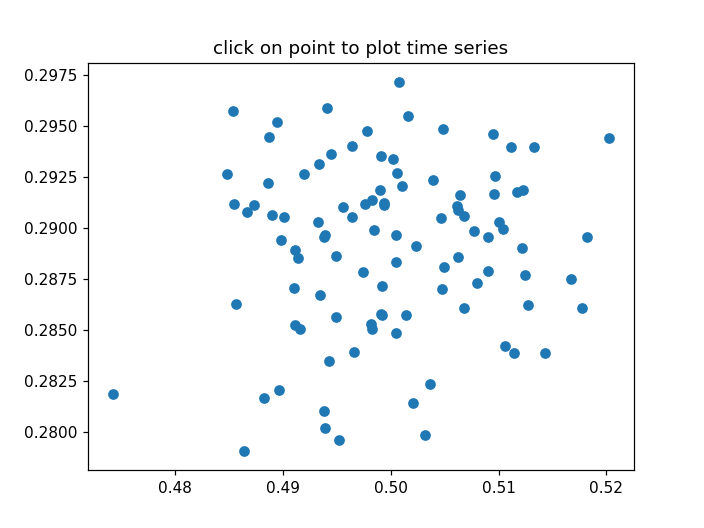

In [92]:
%matplotlib notebook
"""
compute the mean and stddev of 100 data sets and plot mean vs. stddev.
When you click on one of the mu, sigma points, plot the raw data from
the dataset that generated the mean and stddev
"""
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist!=line: return True

    N = len(event.ind)
    if not N: return True


    figi = plt.figure()
    for subplotnum, dataind in enumerate(event.ind):
        ax = figi.add_subplot(N,1,subplotnum+1)
        ax.plot(X[dataind])
        ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

<IPython.core.display.Javascript object>


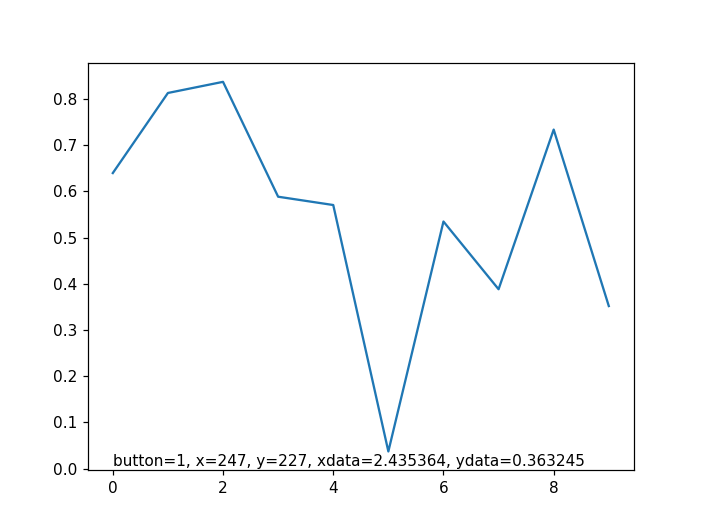

In [96]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0,0,"",va='bottom', ha='left')

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %(event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)    

<IPython.core.display.Javascript object>


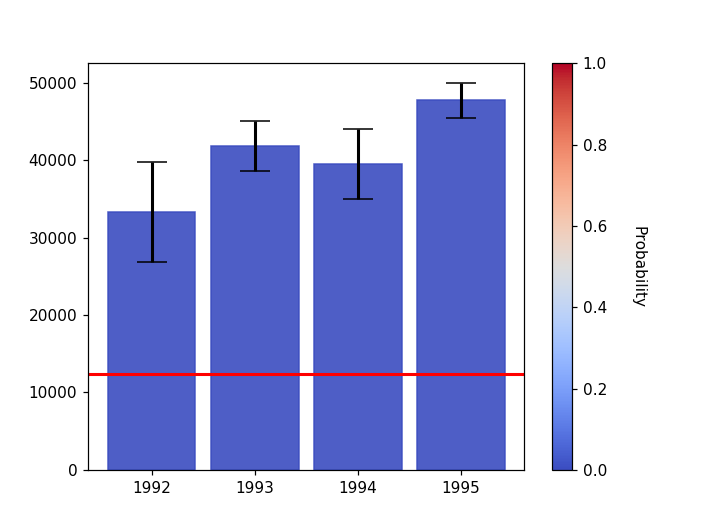

Textarea(value='', description='Y Value:', placeholder='')

In [102]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable

%matplotlib notebook

###Set up dummy data
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

###Calculate statistics incl confidence interval for the mean.  Calculate 97.5% interquantile range of the normal distribution (being 1.96 x standard error)
df =  df.T
stats = df.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
mean = stats.loc['mean']
onesd_meanerror = df.sem(axis = 0)
error_low = onesd_meanerror*1.96
error_high = onesd_meanerror*1.96

###Setup initial chart and plot bar chart
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis_label = df.columns.values
plt.xticks(x_axis_label)

bars = (ax.bar(x_axis_label, mean, width=0.85, alpha=0.9, align='center',
                yerr = (error_low, error_high), error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':1}))

###Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='Y Value:',
    disabled=False)
display(txt)

### Formats color bar.  Need the scalar mapable to enable use of the color bar.
my_cmap = plt.cm.get_cmap('coolwarm')
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Probability', rotation=270,labelpad=25)

ydataselect = 40000

class ClickChart(object):

    def __init__(self, ax):
        self.fig=ax.figure
        self.ax = ax
        self.horiz_line = ax.axhline(y=ydataselect, color='black', linewidth=2)
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)

### Event handlers
    def onclick(self, event):
        self.horiz_line.remove()
        self.ypress = event.ydata
        self.horiz_line = ax.axhline(y=self.ypress, color='red', linewidth=2)
        txt.value = str(event.ydata)
        self.color_bar(event)

    def color_bar(self, event):

        for index, bar in enumerate(bars):
            bar.set_color(c=my_cmap(self.calc_prob(index)))
            print(index)

    def calc_prob(self, index):
        global mean, onesd_meanerror
        mean2 = mean.iloc[index]
        err = onesd_meanerror.iloc[index]
        result = norm.cdf(self.ypress, loc=mean2, scale=err)
        return result

click = ClickChart(ax)